<a href="https://colab.research.google.com/github/princesse85/sentiment0/blob/main/sentiment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLP and Word Cloud
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

# Standard library imports
from string import punctuation
import re, string, unicodedata
import pandas as pd
# SKlearn and Evaluation Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

# To Supress Warning
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
train_dataset = pd.read_csv('/content/e commerce reviews train.csv', low_memory=False)

In [7]:
test_dataset = pd.read_csv('/content/e commerce reviews test.csv')

In [8]:
train_dataset.head()

,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [9]:
test_dataset.head()

,labels,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [10]:
print(train_dataset.shape)
print(test_dataset.shape)

(3600010, 2)
(400000, 2)


In [11]:
print('Train Dataset Information')
print(train_dataset.info())
print('Test Dataset Information')
print(test_dataset.info())

Train Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600010 entries, 0 to 3600009
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   labels  object
 1   text    object
dtypes: object(2)
memory usage: 54.9+ MB
None
Test Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   labels  400000 non-null  object
 1   text    400000 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB
None


In [12]:
## Checking for Null values within both datasets
print('Checking for Null Values in the Train Dataset')
train_dataset.isnull().sum()

Checking for Null Values in the Train Dataset


,0
labels,0
text,0


In [13]:
print('Checking for Null Values in the Test Dataset')
test_dataset.isnull().sum()

Checking for Null Values in the Test Dataset


,0
labels,0
text,0


In [14]:
train_dataset.describe()

,labels,text
count,3600010,3600010
unique,2,3600000
top,__label__2,Stuning even for the non-gamer: This sound tra...
freq,1800009,2


### DATA CLEANING AND PREPROCESSING

In [15]:
# Initialize the list of stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(content):
    """
    Tokenize, convert text to lowercase and remove stops like this, is,to
    """
    # Convert text to lowercase and tokenize
    tokens = word_tokenize(content.lower())
    # Remove stopwords (and optionally punctuation or other unwanted tokens)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Reconstruct the text from the filtered tokens
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

# Test Case
Test_case_for_remove_stop_words= "This is an example sentence, to demonstrate how to remove stopwords."
cleaned_text = remove_stopwords(Test_case_for_remove_stop_words)
print(cleaned_text)

example sentence demonstrate remove stopwords


In [16]:
# Expansion of English Contractions
def contraction_expansion(content):
  """
  Expand English Contracted words like won't, didn't.
  """
  content = re.sub(r'won\'t', 'would not', content)
  content = re.sub(r'didn\'t', 'did not', content)
  content = re.sub(r'can\'t', 'can not', content)
  content = re.sub(r'don\'t', 'do not', content)
  content = re.sub(r'won\'t', 'would not', content)
  content = re.sub(r'doesn\'t', 'does not', content)
  content = re.sub(r'mightn\'t', 'might not', content)
  content = re.sub(r'shouldn\'t', 'should not', content)
  content = re.sub(r'weren\'t', 'were not', content)
  content = re.sub(r'hasn\'t', 'has not', content)
  content = re.sub(r'haven\'t', 'have not', content)
  content = re.sub(r'needn\'t', 'need not', content)
  content = re.sub(r'\'re', ' are', content)
  content = re.sub(r'\'ve', ' have', content)
  content = re.sub(r'\'ll', ' will', content)
  content = re.sub(r'\'s', ' is', content)
  content = re.sub(r'\'m', ' am', content)
  return content

# Test Case For Words Contraction Expansion:
Test_case_for_words_contraction_expansion = "I'm going to the park, but I can't find my keys. They won't be happy about it."
expanded_sample = contraction_expansion(Test_case_for_words_contraction_expansion)
print(expanded_sample)


I am going to the park, but I can not find my keys. They would not be happy about it.


In [17]:
## Remove Special Characters
def remove_special_characters(content):
    """
    Remove the Special Characters
    """
    # Replacing special characters with
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', content)
    return cleaned_text

# Test Case for Removing Special Characters
Test_case_for_removing_special_characters = "Hello!!! This (example) #text contains @special$ characters??."
cleaned_text = remove_special_characters(Test_case_for_removing_special_characters)
print(cleaned_text)


Hello This example text contains special characters


In [18]:
## Remove Urls
def remove_urls(text):
    """
    Remove URLs.
    """
    # Replaces urls with a space
    return re.sub(r'http\S+|www\.\S+', '', text)

# Test Case for removing URLs
Test_case_for_removing_urls = "Check out https://www.example.com or visit www.example.org for more info!"
cleaned_text = remove_urls(Test_case_for_removing_urls)
print(cleaned_text)


Check out  or visit  for more info!


In [19]:
def clean_text(content):
    """
    Apply all the preprocessed funtions into one summarised function
    """
    # Expand contractions
    content = contraction_expansion(content)
    # Remove URLs
    content = remove_urls(content)
    # Remove special characters
    content = remove_special_characters(content)
    # Remove stopwords (and make everything lowercase)
    content = remove_stopwords(content)

    return content

## Test Case for Total cleaning
Test_case_for_text_cleaning = (
    "OMG!!! I can't believe this happened... Visit https://www.coolstuff.com for "
    "the latest updates, or email me at test_email@example.org. #Amazing, right? 🤩 "
    "Also, check out <b>our blog</b> for more info. Seriously---this is the best!! 1234"
)
cleaned_text = clean_text(Test_case_for_text_cleaning)
print(cleaned_text)

omg believe happened visit latest updates email testemailexampleorg amazing right also check bour blogb info seriouslythis best


In [20]:
# Apply the cleaning function
train_dataset["text"] = train_dataset["text"].apply(clean_text)
test_dataset["text"] = test_dataset["text"].apply(clean_text)


In [21]:
## Mapping the labels 1 and label 2 with Negative and Positive
mapping_dict = {
    '__label__1' : 'negative',
    '__label__2'	: 'positive'
}

train_dataset['labels'] = train_dataset['labels'].map(mapping_dict)
test_dataset['labels'] = test_dataset['labels'].map(mapping_dict)


In [22]:
train_dataset.head()


,labels,text
0,positive,stuning even nongamer sound track beautiful pa...
1,positive,best soundtrack ever anything reading lot revi...
2,positive,amazing soundtrack favorite music time hands i...
3,positive,excellent soundtrack truly like soundtrack enj...
4,positive,remember pull jaw floor hearing played game kn...


In [1]:
# checking the value counts for both positive and negative in each dataset
print(train_dataset['labels'].value_counts())
print(test_dataset['labels'].value_counts())


NameError: name 'train_dataset' is not defined

In [ ]:
## Word Frequency
## Checking for the most common words used
from collections import Counter

# Combine all reviews into one large text (already cleaned)
all_text = " ".join(train_dataset["text"].tolist())

# Split into individual words/tokens
tokens = all_text.split()

# Count word frequencies
word_freq = Counter(tokens)

# Show the 20 most common words
print(word_freq.most_common(20))


In [31]:
# The top 20 Most Common words within the dataset visualised
common_words = word_freq.most_common(20)
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

plt.figure(figsize=(5,2))
sns.barplot(x=counts, y=words, palette="coolwarm")
plt.title("Top 10 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


NameError: name 'word_freq' is not defined

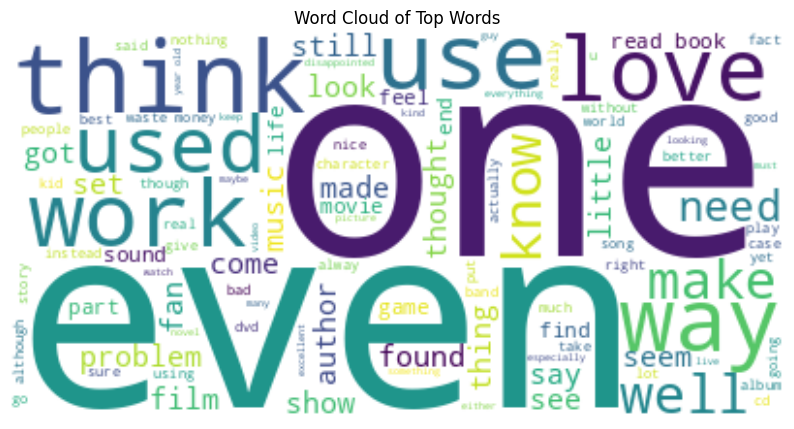

In [ ]:
## Word CLoud

wordcloud = WordCloud(background_color="white", max_words=100).generate(all_text)

plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top Words")
plt.show()


In [ ]:
## Checking for multi-word phrases that might carry strong sentiment
from nltk import ngrams

tokens = all_text.split()
bigrams = list(ngrams(tokens, 2))
trigram_freq = Counter(bigrams)
print(trigram_freq.most_common(10))


[(('waste', 'money'), 9848), (('read', 'book'), 9790), (('would', 'recommend'), 8061), (('one', 'best'), 6657), (('year', 'old'), 6469), (('much', 'better'), 6465), (('highly', 'recommend'), 6283), (('waste', 'time'), 6054), (('great', 'book'), 5398), (('years', 'ago'), 5168)]


### MODEL TRAINING AND EVALUATION

In [ ]:
## Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


In [ ]:
## split the training dataset into train set and validation set
train_df, val_df = train_test_split(train_dataset, test_size=0.2, random_state=42, stratify=train_dataset["labels"])
print(train_df.shape, val_df.shape)


(320000, 2) (80000, 2)


In [ ]:
## Prepare Data for Vectorization
X_train = train_df["text"]
y_train = train_df["labels"]

X_val = val_df["text"]
y_val = val_df["labels"]

X_test = test_dataset["text"]
y_test = test_dataset["labels"]


In [ ]:
## Initialising TFidfVectorizer
tfidf = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words=None
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform validation and test data
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)



## Logistic Regression

In [ ]:
# Logistic Regression
lr_model = LogisticRegression(solver='saga',max_iter=1000,n_jobs=-1)

lr_model.fit(X_train_tfidf, y_train)

val_preds = lr_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("Logistic Regression -> Accuracy:", accuracy, "Precision:",precision,"Recall:",recall,"F1:", f1)


Logistic Regression -> Accuracy: 0.90015 Precision: 0.897723884305735 Recall: 0.9032 F1: 0.9001490711367343


## Support Vector Machine (SVM)

In [ ]:
# Support Vector Machine Classifier
svm_model = LinearSVC(max_iter=2000)
svm_model.fit(X_train_tfidf, y_train)

val_preds = svm_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("SVM -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall,"F1:", f1)


SVM -> Accuracy: 0.8991125 Precision: 0.8962692680020851 Recall: 0.9027 F1: 0.8991112015453999


## Random Forest

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)

val_preds = rf_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("Random Forest -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall,"F1:", f1)


Random Forest -> Accuracy: 0.8607875 Precision: 0.8609589555038644 Recall: 0.86055 F1: 0.8607874921475445


## XGBoost

In [ ]:
# XGBoost Model
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss"
)
mapping = {"negative": 0, "positive": 1}
y_train_map = y_train.map(mapping)
y_val_map = y_val.map(mapping)

xgb_model.fit(X_train_tfidf, y_train_map)

val_preds = xgb_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val_map, val_preds)
precision = precision_score(y_val_map, val_preds,pos_label=1)
recall = recall_score(y_val_map,val_preds,pos_label=1)
f1 = f1_score(y_val_map, val_preds, average='macro')
print("XGBoost -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall, "F1:", f1)


XGBoost -> Accuracy: 0.8437875 Precision: 0.8470410094637224 Recall: 0.8391 F1: 0.8437840675210149


### Final Evaluation on the Test Set

Test Accuracy: 0.8992
Test F1 Score: 0.8995
Classification Report (Test):
              precision    recall  f1-score   support

    negative       0.90      0.90      0.90   1800001
    positive       0.90      0.90      0.90   1800009

    accuracy                           0.90   3600010
   macro avg       0.90      0.90      0.90   3600010
weighted avg       0.90      0.90      0.90   3600010



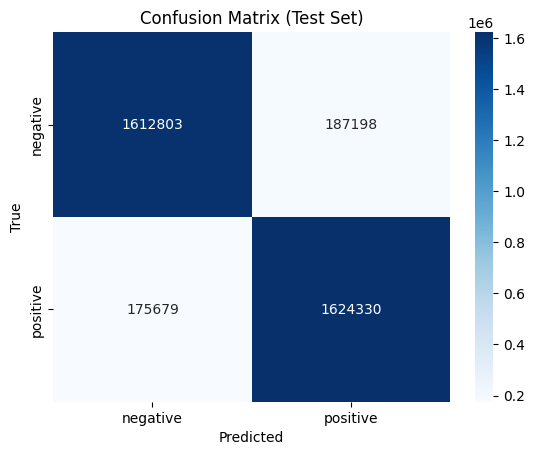

In [ ]:
## Applying Logistic Regression on the Test Set
test_preds = lr_model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, pos_label="positive")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

print("Classification Report (Test):")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds, labels=["negative", "positive"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


### SAVE MODEL AND VECTORIZER

In [ ]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)


In [ ]:
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

with open("sentiment_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)

# Quick test
sample_text = ["This product is amazing!"]
sample_vector = tfidf_loaded.transform(sample_text)
sample_prediction = model_loaded.predict(sample_vector)
print(sample_prediction)

['positive']


### TRANSFORMER MODEL: HUGGING FACE TRANSFORMER

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch

In [ ]:
# Define a mapping for your labels
label_mapping = {"negative": 0, "positive": 1}

## Prepare list for tekenization
X_train = train_df["text"].tolist()
y_train = train_df["labels"].tolist()
X_val = val_df["text"].tolist()
y_val = val_df["labels"].tolist()
X_test = test_dataset["text"].tolist()
y_test = test_dataset["labels"].tolist()

# Define the subset sizes
subset_train_size = 1000   # Use 1,000 samples for training
subset_val_size   = 200   # Use 200 samples for validation
subset_test_size  = 500    # Use 500 samples for testing

# Create subsets by slicing the lists
X_train = X_train[:subset_train_size]
y_train = y_train[:subset_train_size]
X_test = X_test[:subset_test_size]
y_test = y_test[:subset_test_size]

X_val = X_val[:subset_val_size]
y_val = y_val[:subset_val_size]

# Convert the labels in the training, validation, and test sets
y_train = [label_mapping[label] for label in y_train]
y_val = [label_mapping[label] for label in y_val]
y_test = [label_mapping[label] for label in y_test]

In [ ]:
## Tokenize with Hugging Face Transformer
local_model_path = "/kaggle/input/bertbaseuncased/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(local_model_path, local_files_only=True)

In [ ]:
## Tokenize the datasets (padding and truncation for uniform input size)
def batch_tokenize(texts, batch_size=1000, max_length=128):
    all_encodings = {"input_ids": [], "attention_mask": []}
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        encoding = tokenizer(batch, truncation=True, padding="max_length", max_length=max_length)
        all_encodings["input_ids"].extend(encoding["input_ids"])
        all_encodings["attention_mask"].extend(encoding["attention_mask"])
    return all_encodings

train_encodings = batch_tokenize(X_train, batch_size=1000, max_length=128)
val_encodings   = batch_tokenize(X_val, batch_size=1000, max_length=128)
test_encodings  = batch_tokenize(X_test, batch_size=1000, max_length=128)


In [ ]:
## Creating Custom Pytorch Dataset

class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self,encodings,labels):
        self.encodings = encodings
        self.labels = labels
    def __getitem__(self, idx):
        # Convert lists to tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets for training, validation, and testing
train_dataset_pt = SentimentDataset(train_encodings, y_train)
val_dataset_pt   = SentimentDataset(val_encodings, y_val)
test_dataset_pt  = SentimentDataset(test_encodings, y_test)



In [ ]:
## Initialize the Transformer Model
# For binary classification, set num_labels=2.
HGT_model = AutoModelForSequenceClassification.from_pretrained(local_model_path, num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /kaggle/input/bertbaseuncased/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    return {
        "eval_accuracy": accuracy_score(labels, predictions),
        "eval_precision": precision_score(labels, predictions, pos_label=1),
        "eval_recall": recall_score(labels, predictions, pos_label=1),
        "eval_f1": f1_score(labels, predictions, average='macro')
    }

In [ ]:
## Set Up Training Arguments and Trainer
training_args = TrainingArguments(
    output_dir='./results',              # output directory
    num_train_epochs=3,                  # total number of training epochs
    per_device_train_batch_size=16,      # batch size per device during training
    per_device_eval_batch_size=16,       # batch size for evaluation
    evaluation_strategy="epoch",         # evaluate each epoch
    save_strategy="epoch",               # save model checkpoint each epoch (matches evaluation_strategy)
    logging_dir='./logs',                # directory for storing logs
    logging_steps=10,
    load_best_model_at_end=True,         # load the best model when finished training
    report_to=[]
)

trainer = Trainer(
    model=HGT_model,
    args=training_args,
    train_dataset=train_dataset_pt,
    eval_dataset=val_dataset_pt,
    compute_metrics=compute_metrics
)

In [ ]:
## Train the Model
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.409300,0.440060,0.810000,0.745902,0.928571,0.808081
2,0.301400,0.428347,0.830000,0.790909,0.887755,0.829728
3,0.064700,0.559919,0.845000,0.845361,0.836735,0.844903


TrainOutput(global_step=189, training_loss=0.31857430020337385, metrics={'train_runtime': 1884.4026, 'train_samples_per_second': 1.592, 'train_steps_per_second': 0.1, 'total_flos': 197333291520000.0, 'train_loss': 0.31857430020337385, 'epoch': 3.0})

In [ ]:
## Evaluate on the test set
results = trainer.evaluate(eval_dataset=test_dataset_pt)
print("Test evaluation:", results)

# Evaluation metrics:
eval_loss = results.get("eval_loss")
eval_accuracy = results.get("eval_accuracy")
eval_precision = results.get("eval_precision")
eval_recall = results.get("eval_recall")
eval_f1 = results.get("eval_f1")

print(f"Loss: {eval_loss}")
print(f"Accuracy: {eval_accuracy}")
print(f"Precision: {eval_precision}")
print(f"Recall: {eval_recall}")
print(f"F1 Score: {eval_f1}")

Test evaluation: {'eval_accuracy': 0.85, 'eval_precision': 0.8243727598566308, 'eval_recall': 0.8984375, 'eval_f1': 0.8492613807657522, 'eval_loss': 0.39170041680336, 'eval_runtime': 93.4899, 'eval_samples_per_second': 5.348, 'eval_steps_per_second': 0.342, 'epoch': 3.0}
Loss: 0.39170041680336
Accuracy: 0.85
Precision: 0.8243727598566308
Recall: 0.8984375
F1 Score: 0.8492613807657522
